In [1]:
from rlway.pyosrd.osrd import OSRD

from rlway_cpagent.cp_agent import CPAgent
from rlway.schedules import Schedule, schedule_from_osrd

import nest_asyncio  
nest_asyncio.apply()

In [2]:
sim = OSRD(use_case='station_capacity2', dir='tmp')
sim.reset_delays()
sim.add_delay('train0', time_threshold=150, delay=800.)
regulated = sim.regulate(agent=CPAgent("cp_agent"))

[17:34:31,460] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[17:34:31,491] [INFO]              [FullInfra] parsing infra
[17:34:31,553] [INFO]              [FullInfra] adaptation to kotlin
[17:34:31,591] [INFO]              [FullInfra] loading signals
[17:34:31,598] [INFO]              [FullInfra] building blocks
[17:34:31,603] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[17:34:31,617] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[17:34:31,673] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[17:34:31,681] [INFO]  [StandaloneSimulationCommand] All simulations completed
[17:34:31,681] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json
[17:34:32,471] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[17:34:32,501] [INFO]              [FullInfra] parsing infra
[17:34:32,575] [INFO]              [FullInfra] adaptation to k

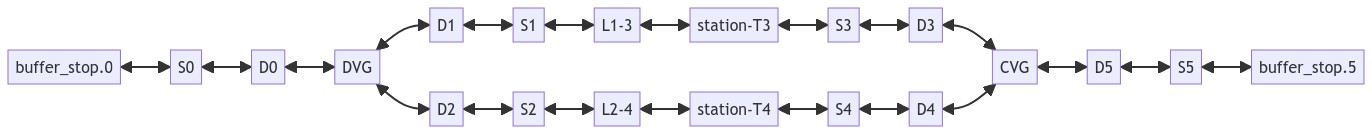

In [3]:
sim.draw_infra_points()

In [4]:
ref_schedule = schedule_from_osrd(sim)
delayed_schedule = schedule_from_osrd(sim.delayed())
regulated_schedule = schedule_from_osrd(regulated)

<Axes: xlabel='Time'>

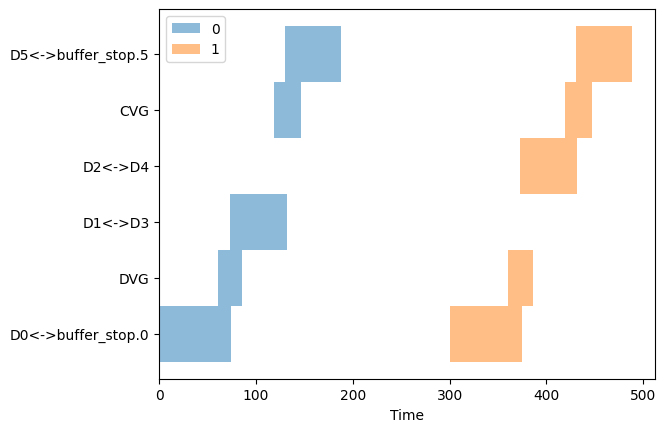

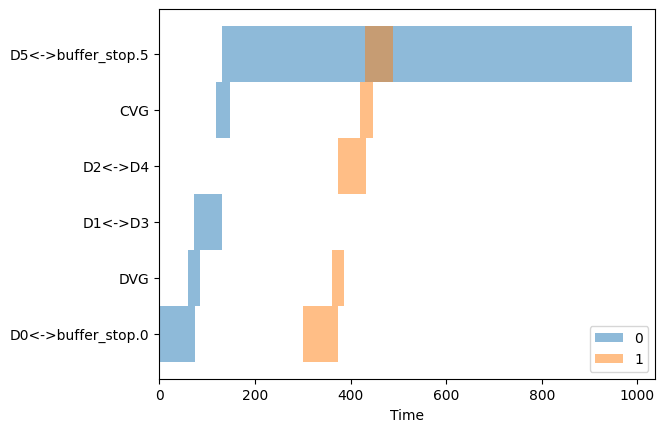

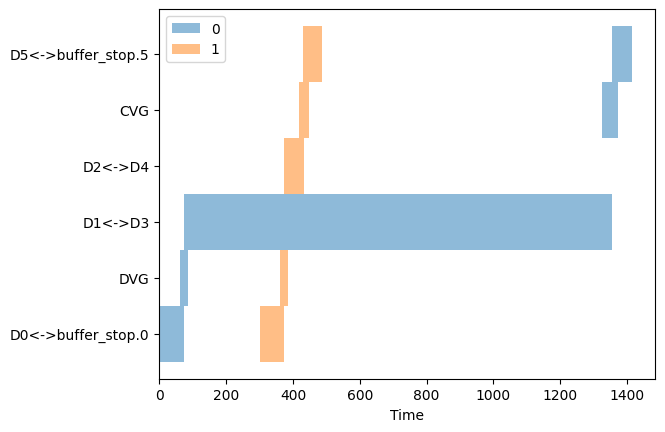

In [5]:
ref_schedule.plot()
delayed_schedule.plot()
regulated_schedule.plot()

In [6]:
print(ref_schedule.trajectory(0))
print(ref_schedule.trajectory(1))

['D0<->buffer_stop.0', 'DVG', 'D1<->D3', 'CVG', 'D5<->buffer_stop.5']
['D0<->buffer_stop.0', 'DVG', 'D2<->D4', 'CVG', 'D5<->buffer_stop.5']


In [7]:
ref_schedule.draw_graph()

<Axes: title={'center': 'train0 (base)'}, xlabel='Time [min]'>

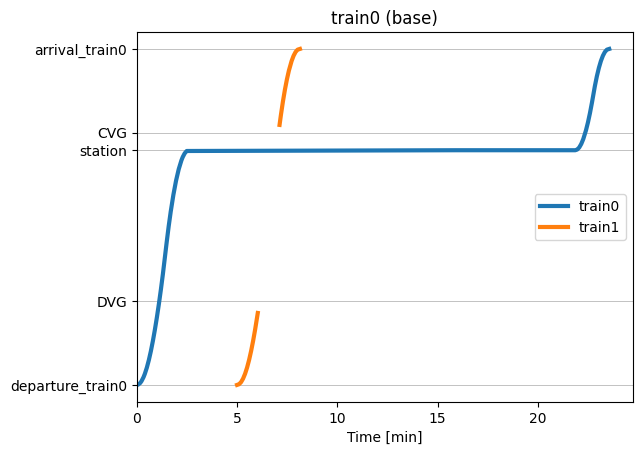

In [8]:
regulated.space_time_chart(0)